#**Лабораторная работа № 4 "Поиск колизии хеш-функции"**
**В рамках курса "Основы информационной безопасности"**  
*Специальность "Информационная безопасность автоматизированных систем", 2 курс, 2 семестр*  

В данной лабораторной работе вы попытаетесь восстановить номер банковской карты по ее [хешу](https://habr.com/ru/post/534596/) с использованием дополнительной информации о типе карты, типе платежной системы и ее банке-эмитенте.   

Тематика лабораторной вдохновлена сообщением об [этой утечке](https://www.securitylab.ru/news/536831.php) данных пользователей банковских карт.

##Задание  
Реализовать приложение (можно консольное), которео будет выполнять следующие сценарии работы:

###1. Подобрать номер карты по ее хешу с использованием вспомогательной информации
*Входные параметры:*  
*1) хеш номера банковской карты,*  
*2) последние 4 цифры карты,*  
*3) [БИН](https://www.banki.ru/wikibank/bankovskiy_identifikatsionnyiy_nomer/) карты (выясненный вами при помощи вспомогательной информации о банке-эмитенте и типе карты).*  

1.1. Определить доступное на вашем железе количество процессов.  
1.2. Запустить подбор номера карты по ее хешу с использоватнием библиотеки [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) на оптимальном числе процессов.  
1.3. Сериализовать подобранный номер карты в файл общеиспользуемого обменного формата.  

###2. Проверить корректность номера карты при помощи алгоритма Луна
*Входные параметры:*  
*1) номер банковской карты.*  

2.1. Написать собственную реализацию [алгоритма Луна](https://unece.org/fileadmin/DAM/trans/doc/2020/sc2/ECE-TRANS-SC.2-EG_PIRRS-2020-4r.pdf).  
2.2. Проверить номер карты на корректность (все номера банковских карт в условии лабораторной сознательно созданы некорректными).  
2.3. Продемонстрировать результат работы алгоритма пользователю.  

###3. Замерить время для поиска коллизии хеша при различном числе процессов
*Входные параметры:*  
*1) хеш номера банковской карты,*  
*2) последние 4 цифры карты,*  
*3) [БИН](https://www.banki.ru/wikibank/bankovskiy_identifikatsionnyiy_nomer/) карты (выясненный вами при помощи вспомогательной информации о банке-эмитенте и типе карты).*  

3.1. Выполнить подбор номера карты по ее хешу с использоватнием библиотеки [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) на различном числе процессов - от `1` до `1.5*<число ядер вашего железа>`.  
3.2. Визуализировать зависимость времени поиска коллизии от числа процессов при помощи библиотеки [matplotlib](https://matplotlib.org/) (или другой аналогичной библиотеки).  
3.3. На графике отметить точку глобального минимума полученной зависимости.  

Как и в предыдущей лабораторной работе, пользователь должен иметь возможность выбирать произвольный режим работы софта при его запуске.

## Работа с библиотекой multiprocessing
В данном разделе представлены примеры работы с библиотекой [multiprocessing](https://docs.python.org/3/library/multiprocessing.html), которые могут вам пригодиться при выполнении данной лабораторной работы.
С данной библиотекой вы сталкивались во время курса "Прикладное программирование".

In [ ]:
import multiprocessing as mp
# узнаем число доступных ядер
cores = mp.cpu_count() # в коллабе их мало, так что выполнять лабораторную придется на своем железе
print(cores)

2


In [ ]:
from random import randint

rand = randint(0, 99)

def sample_function(x):
    return x if x == rand else False

# максимально утрированный пример кода, который должен вам намекнуть, как реализовать задание
with mp.Pool(processes=cores) as p:
 for result in p.map(sample_function, range(0, 100)):
        if result:
            print(f'we have found {result} and have terminated pool')
            p.terminate()
            break

we have found 25 and have terminated pool


## Работа с библиотекой hashlib

В данном разделе представлены примеры работы с библиотекой [hashlib](https://docs.python.org/3/library/hashlib.html), которые могут вам пригодиться при выполнении данной лабораторной работы.

In [ ]:
import hashlib
# доступные в данном пакете алгоритмы хеширования
hashlib.algorithms_available

{'blake2b',
 'blake2s',
 'md4',
 'md5',
 'md5-sha1',
 'ripemd160',
 'sha1',
 'sha224',
 'sha256',
 'sha384',
 'sha3_224',
 'sha3_256',
 'sha3_384',
 'sha3_512',
 'sha512',
 'sha512_224',
 'sha512_256',
 'shake_128',
 'shake_256',
 'sm3',
 'whirlpool'}

In [ ]:
# хеши в задании к лабораторной работе приведены в hex формате
hash = hashlib.sha256(f'1400880042003590'.encode()).hexdigest()
print(type(hash))
print(hash)

<class 'str'>
b98df157bfed0667a483f5b5d4656ed218ccc2c3d202b910aa021b0288219a7f


## Работа с библиотекой matplotlib
В данном разделе представлены примеры работы с библиотекой [multiprocessing](https://docs.python.org/3/library/multiprocessing.html), которые могут вам пригодиться при выполнении данной лабораторной работы.
С данной библиотекой вы сталкивались во время курса "Прикладное программирование".

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

step = .1
x =  np.arange(-10,10.1,step)
y1 = np.sinc(x)

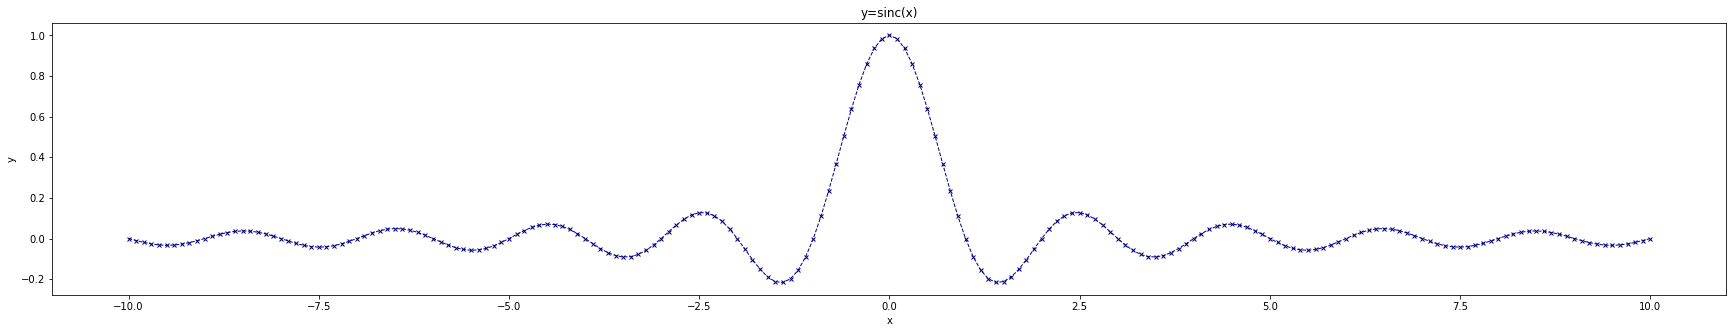

In [ ]:
# несмотря на то, что с данной библиотекой вы работали в прошлом семеcтре, напомню, что matplotlib позволяет строить графики:

fig=plt.figure(figsize=(30, 5))
plt.ylabel('y')
plt.xlabel('x')
plt.title('y=sinc(x)')
plt.plot(x,y1, color='navy', linestyle = '--', marker='x', linewidth=1, markersize=4 )
plt.show()

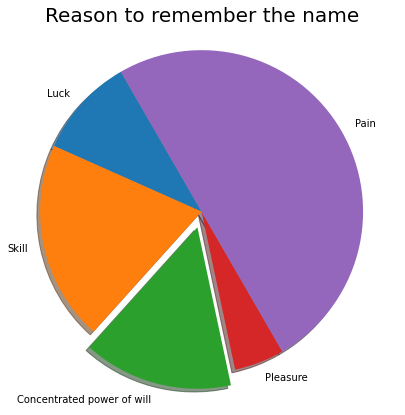

In [ ]:
# напомню, что помимо графиков можно реализовывать различные виды диаграмм, например, круговые...:

labels = 'Luck', 'Skill', 'Concentrated power of will', 'Pleasure', 'Pain' #заголовки, против часовой
sizes = [10, 20, 15, 5, 50] # значения
explode = (0,0,0.1,0,0)  # параметры выделения кусков диаграммы

fig1, ax1 = plt.subplots(figsize=(7, 7))
plt.title('Reason to remember the name', fontsize=20)
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=120)
ax1.axis('equal')  # чтобы получился круг
plt.show()

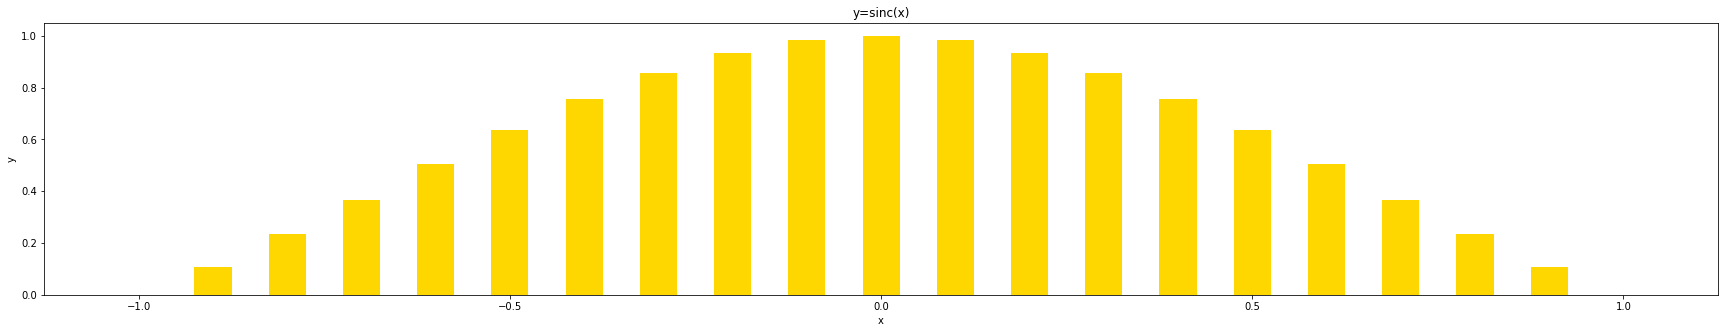

In [ ]:
# ... или столбчатые (которые будут, пожалуй, наиболее подходящими для задания):

fig=plt.figure(figsize=(30, 5))
plt.ylabel('y')
plt.xlabel('x')
plt.title('y=sinc(x)')
plt.bar(x[90:111],y1[90:111], color='gold', width = 0.05)
plt.show()

## Небольшие ремарки к реализации приложения


Поскольку задание к этой лабораторной достаточно примитивное, мне бы хотелось, чтобы вы применили все полученные в рамках дисциплины "Прикладное программирование" навыки.

Хотелось бы видеть в конечном софте некоторые пункты из указанного списка:
* Покрытие кода юнит-теcтами,
* Визуализацию процесса подбора коллизии при помощи [tqdm](https://tqdm.github.io/),
* Графический интерфейс пользователя средствами [pyqt](https://www.riverbankcomputing.com/static/Docs/PyQt6/),
* Работу с параметрами командной строки через [argparse](https://docs.python.org/3/library/argparse.html),
* Что-нибудь еще, что было в рамках курса "Прикладное программирование", о чем я не упомянул.


##Варианты заданий
Вариант соответствует вашему порядковому номеру в списке группы.  

Найти БИН номер можно при помощи сервисов в интернете, например, при помощи [этого](https://finanso.com/ru/bin-search-reverse/).

*Ремарки :*
* Номер карты хешируется в виде строки из 16 символов без пробелов.
* Все "банковские карты" в задании "выпущены в России".
* Если сервис выдает вам несколько вариаций БИН-кодов, вам придется перебирать их все.
* Чтобы облегчить вам жизнь, хеши приведены без [соли](https://auth0.com/blog/adding-salt-to-hashing-a-better-way-to-store-passwords/).
* Также в вариантах приведены последние 4 символа карты, чтобы замер времени подбора символов карты при различных параметрах пула процессов не занял у вас всю оставшуюся жизнь.

|Номер варианта|Значение хеша|Платежная система|Тип карты|Банк-эмитент|Последние 4 символа карты|Алгоритм хеширования из hashlib|
|--|--|--|--|--|--|--|
|1|0438cbc33cb25114ed4ae1cf863527401db733c2d55a01563a84f2955ad5233a129a0220fec715208fee40c9710343d402e22f97f1f8b3dc312f7a20e6585ad2|VISA|Дебетовая|Сбербанк|0877|blake2b|
|2|140495200b351b7f18a46e3796f2875ebdf0023568933ef3b99efb285af3f06b|Mastercard|Кредитная|Сбербанк|2301|blake2s|
|3|bf67709b1216cb66038f3ae5ad2b4c066be03cbb|МИР|Дебетовая|Сбербанк|5688|sha1|
|4|e5c92fb926ffc9976ad06b46cc7eb656158f07b6e41a1666e005c9cd|VISA|Кредитная|Сбербанк|1217|sha224|
|5|4006234246b4fd2b2833d740927ab20465afad862c74b1a88ec0869bde5c836c|Mastercard|Дебетовая|Альфа-банк|0254|sha256|
|6|7dbbccf1e06c2ea6c7f7711cb90b08eee16d1476fa0e75067d84a642494589149eba75ba396ad3ccbb9ca9d2fc5340cf|МИР|Дебетовая|Альфа-банк|6302|sha384|
|7|f56ab81d14e7c55304dff878c3f61f2d96c8ef1f56aff163320e67df|VISA|Дебетовая|Альфа-банк|7819|sha3_224|
|8|cb28fea647fab039e21aedf9762c895f6514d70ae404d5eac3c2b1da26547745|Mastercard|Кредитная|Альфа-банк|5623|sha3_256|
|9|78495810cec383f3f82049d03a522f5141583d1d6577235c74084c1d21f7a1df4612c05c0d6b5eb15edd1270ab5069f0|МИР|Дебетовая|Тинькофф|9920|sha3_384|
|10|e537d605a9f957a2c6ccb8cb2bb59537675e048c7ef78f86389a333d54feb154270a0f9df684f2b0d0e30c4eee9403bfd53b8e32af89f6fba9fd16aafdfa7420|VISA|Кредитная|Тинькофф|5274|sha3_512|
|11|adc0e9f7627c5fd35d240a71e1f2b895f77dec86c543452a2986ee6c736130bee896f104f5b12aa36276f0cc6b4ffcf22ccaaee905ba63f8d9fe31cdc9d034ab|Mastercard|Дебетовая|Тинькофф|2305|sha512|
|12|2083ca0a0960daaa60a509a298d2eec8|Mastercard|Кредитная|Тинькофф|1994|md5|
|13|4f9cbbc1e5a60f526a58cde1343acd900b3f918f6fdff73eb82b0b87ae7d8e22|VISA|Дебетовая|ВТБ|5574|blake2s|
|14|754a917a9c82f5247412006a5abe1c0eb76e1007|Mastercard|Кредитная|ВТБ|0758|sha1|
|15|7f688005d71c909f5d249b5e8a3704e1c5868dd6e07d1b421b4b9247|Mastercard|Дебетовая|ВТБ|9001|sha224|
|16|70ba6e37c3be80134c2fd8563043c0cb9278a43116b3bc2dfad03e2e455ed473|VISA|Кредитная|ВТБ|1378|sha256|
|17|50c6b2ca7a569f006d23b3be8007dd775652c1028c2c44bbb3847008956e179e4f8cc315d8076cf97483279e44075424|Mastercard|Дебетовая|Газпромбанк|1512|sha384|
|18|3f0c13cdb9c926cdf1aa4f5475d12107d69a030ff93deb426804eaad|МИР|Кредитная|Газпромбанк|3663|sha3_224|
|19|0b08d71bd3e26721ff32542069442d82811bff4a1e61134dfeedc14848cd0e39|VISA|Дебетовая|Газпромбанк|0956|sha3_256|
|20|2ee504e22d19eb191313750779dc3329e41c9657b1c24131ca1490b9322fbbfed808eb37646a9e61882113074f0cc4dc|Mastercard|Кредитная|Газпромбанк|5474|sha3_384|